<a href="https://colab.research.google.com/github/LucasMirandaVS/Projeto1---Previsao-com-KNN/blob/main/Previs%C3%A3o_com_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto - Prevendo a ocorrencia de cancer



## 1 - Importando os dados.



In [1]:
df <- read.csv("data.csv", stringsAsFactors = FALSE)
str(df)

'data.frame':	569 obs. of  33 variables:
 $ id                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ diagnosis              : chr  "M" "M" "M" "M" ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.787 1

## 2- Explorando os dados

In [2]:
# Primeiro vou remover a coluna ID e a coluna X
df <- df[-1]
df <- df[-32]
str(df)

'data.frame':	569 obs. of  31 variables:
 $ diagnosis              : chr  "M" "M" "M" "M" ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.787 1.156 0.781 ...
 $ perimeter_se           : num  8.59 3.4 4.58 3.44 5.44 ...
 $ area_se                : num  153.4 74

In [3]:
any(is.na(df)) # Agora o data frame não em mais valores NA

[1] FALSE

In [4]:
# Agora vou tratar de categorizar a coluna que identifica o tipo de tumor
table(df$diagnosis)


  B   M 
357 212 

In [5]:
df$diagnosis <- factor(df$diagnosis,
                       levels = c('B', 'M'),
                       labels = c('Benigno', 'Maligno'))

str(df$diagnosis)

 Factor w/ 2 levels "Benigno","Maligno": 2 2 2 2 2 2 2 2 2 2 ...


In [6]:
# Agora da pra verificar a proporção dessa variável
round(prop.table(table(df$diagnosis)) * 100, digits = 1)


Benigno Maligno 
   62.7    37.3 

In [7]:
# Medidas de tendência central
summary(df[c('radius_mean', 'area_mean', 'smoothness_mean')])

  radius_mean       area_mean      smoothness_mean  
 Min.   : 6.981   Min.   : 143.5   Min.   :0.05263  
 1st Qu.:11.700   1st Qu.: 420.3   1st Qu.:0.08637  
 Median :13.370   Median : 551.1   Median :0.09587  
 Mean   :14.127   Mean   : 654.9   Mean   :0.09636  
 3rd Qu.:15.780   3rd Qu.: 782.7   3rd Qu.:0.10530  
 Max.   :28.110   Max.   :2501.0   Max.   :0.16340  

In [8]:
# Normalizando as variáveis
normal <- function(x){
  return((x - min(x))/ (max(x) - min(x)))
} # essa função normaliza um vetor numerico

In [10]:
normal(c(1,2,3,4,5))

normal(c(10,20,30,40,50)) # a função funciona pois devolve dois valores iguais


[1] 0.00 0.25 0.50 0.75 1.00

[1] 0.00 0.25 0.50 0.75 1.00

In [12]:
# Aplicando a função aos dados
df_normal <- as.data.frame(lapply(df[2:31], normal))

In [13]:
summary(df_normal[c('radius_mean', 'area_mean', 'smoothness_mean')]) # funcionou

  radius_mean       area_mean      smoothness_mean 
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2233   1st Qu.:0.1174   1st Qu.:0.3046  
 Median :0.3024   Median :0.1729   Median :0.3904  
 Mean   :0.3382   Mean   :0.2169   Mean   :0.3948  
 3rd Qu.:0.4164   3rd Qu.:0.2711   3rd Qu.:0.4755  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

## 3 - Treinando o modelo

In [14]:
# Pacote com a função KnN
install.packages('class')
library(class)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
# Separando os dados de treino e de teste:
treino <- df_normal[1:469,]
teste <- df_normal[470:569,]

In [16]:
# Colocando as labels
treino_labels <- df[1:469, 1]
teste_labels <- df[470:569, 1]

In [17]:
# Agora ja é possível criar o modelo
modelo1 <- knn(train = treino,
               test = teste,
               cl = treino_labels,
               k = 21)
class(modelo1)

[1] "factor"



## 4 - Avaliando e interpretando o modelo
---



In [18]:
# Instalando o pacote gmodels para auxiliar na availação
install.packages('gmodels')
library(gmodels)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’




In [19]:
# Tabela cruzada: Dados previstos vs Dados atuais
CrossTable(x = teste_labels, y = modelo1, prop.chisq = FALSE) # O modelo teve 98% de acerto


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | modelo1 
teste_labels |   Benigno |   Maligno | Row Total | 
-------------|-----------|-----------|-----------|
     Benigno |        77 |         0 |        77 | 
             |     1.000 |     0.000 |     0.770 | 
             |     0.975 |     0.000 |           | 
             |     0.770 |     0.000 |           | 
-------------|-----------|-----------|-----------|
     Maligno |         2 |        21 |        23 | 
             |     0.087 |     0.913 |     0.230 | 
             |     0.025 |     1.000 |           | 
             |     0.020 |     0.210 |           | 
-------------|-----------|-----------|-----------|
Column Total |        79 |        21 |       100 | 
             |     0.790 |     0.210 |           | 
-------------|--------

## 5 - Otimizando o modelo

In [20]:
# Usando scale pra padronizar o z-score
df_z <- as.data.frame(scale(df[-1]))
summary(df_z$area_mean) #funcionou

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.4532 -0.6666 -0.2949  0.0000  0.3632  5.2459 

In [21]:
 # Refazendo os dados de treino e teste
treino_z <- df_z[1:469,]
teste_z <- df_z[470:569,]

In [22]:
# Testando o modelo de novo
modelo2 <- knn(train = treino_z,
               test = teste_z,
               cl = treino_labels,
               k = 21)
CrossTable(x = teste_labels, y = modelo2, prop.chisq = FALSE) # Não adiantou


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | modelo2 
teste_labels |   Benigno |   Maligno | Row Total | 
-------------|-----------|-----------|-----------|
     Benigno |        77 |         0 |        77 | 
             |     1.000 |     0.000 |     0.770 | 
             |     0.975 |     0.000 |           | 
             |     0.770 |     0.000 |           | 
-------------|-----------|-----------|-----------|
     Maligno |         2 |        21 |        23 | 
             |     0.087 |     0.913 |     0.230 | 
             |     0.025 |     1.000 |           | 
             |     0.020 |     0.210 |           | 
-------------|-----------|-----------|-----------|
Column Total |        79 |        21 |       100 | 
             |     0.790 |     0.210 |           | 
-------------|--------

In [23]:
# Hora de mudar os valores de k pra achar um modelo mais otimizado
  # Vou usar os valores normalizados mesmo

modelo3 <- knn(train = treino,
               test = teste,
               cl = treino_labels,
               k = 1)
CrossTable(x = teste_labels, y = modelo3, prop.chisq = FALSE) # esse ficou pior ainda



 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | modelo3 
teste_labels |   Benigno |   Maligno | Row Total | 
-------------|-----------|-----------|-----------|
     Benigno |        72 |         5 |        77 | 
             |     0.935 |     0.065 |     0.770 | 
             |     0.973 |     0.192 |           | 
             |     0.720 |     0.050 |           | 
-------------|-----------|-----------|-----------|
     Maligno |         2 |        21 |        23 | 
             |     0.087 |     0.913 |     0.230 | 
             |     0.027 |     0.808 |           | 
             |     0.020 |     0.210 |           | 
-------------|-----------|-----------|-----------|
Column Total |        74 |        26 |       100 | 
             |     0.740 |     0.260 |           | 
-------------|--------

In [24]:
modelo4 <- knn(train = treino,
               test = teste,
               cl = treino_labels,
               k = 5)
CrossTable(x = teste_labels, y = modelo4, prop.chisq = FALSE) # melhorou de um lado mas piorou de outro



 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | modelo4 
teste_labels |   Benigno |   Maligno | Row Total | 
-------------|-----------|-----------|-----------|
     Benigno |        74 |         3 |        77 | 
             |     0.961 |     0.039 |     0.770 | 
             |     1.000 |     0.115 |           | 
             |     0.740 |     0.030 |           | 
-------------|-----------|-----------|-----------|
     Maligno |         0 |        23 |        23 | 
             |     0.000 |     1.000 |     0.230 | 
             |     0.000 |     0.885 |           | 
             |     0.000 |     0.230 |           | 
-------------|-----------|-----------|-----------|
Column Total |        74 |        26 |       100 | 
             |     0.740 |     0.260 |           | 
-------------|--------

In [25]:
modelo5 <- knn(train = treino,
               test = teste,
               cl = treino_labels,
               k = 15)
CrossTable(x = teste_labels, y = modelo5, prop.chisq = FALSE) # igual ao modelo1


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | modelo5 
teste_labels |   Benigno |   Maligno | Row Total | 
-------------|-----------|-----------|-----------|
     Benigno |        77 |         0 |        77 | 
             |     1.000 |     0.000 |     0.770 | 
             |     0.975 |     0.000 |           | 
             |     0.770 |     0.000 |           | 
-------------|-----------|-----------|-----------|
     Maligno |         2 |        21 |        23 | 
             |     0.087 |     0.913 |     0.230 | 
             |     0.025 |     1.000 |           | 
             |     0.020 |     0.210 |           | 
-------------|-----------|-----------|-----------|
Column Total |        79 |        21 |       100 | 
             |     0.790 |     0.210 |           | 
-------------|--------

In [26]:

modelo6 <- knn(train = treino,
               test = teste,
               cl = treino_labels,
               k = 11)
CrossTable(x = teste_labels, y = modelo6, prop.chisq = FALSE) # diminuiu para 1% o erro do beningo mas aumentou em 1% o erro do maligno


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | modelo6 
teste_labels |   Benigno |   Maligno | Row Total | 
-------------|-----------|-----------|-----------|
     Benigno |        76 |         1 |        77 | 
             |     0.987 |     0.013 |     0.770 | 
             |     0.987 |     0.043 |           | 
             |     0.760 |     0.010 |           | 
-------------|-----------|-----------|-----------|
     Maligno |         1 |        22 |        23 | 
             |     0.043 |     0.957 |     0.230 | 
             |     0.013 |     0.957 |           | 
             |     0.010 |     0.220 |           | 
-------------|-----------|-----------|-----------|
Column Total |        77 |        23 |       100 | 
             |     0.770 |     0.230 |           | 
-------------|--------

In [27]:

modelo7 <- knn(train = treino,
               test = teste,
               cl = treino_labels,
               k = 27)
CrossTable(x = teste_labels, y = modelo7, prop.chisq = FALSE) # igual ao modelo1
  # Aparentemente o primeiro modelo era o mais otimizado pois tinha 2% de erro pros diagnósticos benignos e 0 nos malignos


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
             | modelo7 
teste_labels |   Benigno |   Maligno | Row Total | 
-------------|-----------|-----------|-----------|
     Benigno |        77 |         0 |        77 | 
             |     1.000 |     0.000 |     0.770 | 
             |     0.975 |     0.000 |           | 
             |     0.770 |     0.000 |           | 
-------------|-----------|-----------|-----------|
     Maligno |         2 |        21 |        23 | 
             |     0.087 |     0.913 |     0.230 | 
             |     0.025 |     1.000 |           | 
             |     0.020 |     0.210 |           | 
-------------|-----------|-----------|-----------|
Column Total |        79 |        21 |       100 | 
             |     0.790 |     0.210 |           | 
-------------|--------


## 6 - Calculando as taxas de erro

In [28]:
prev <- NULL
taxa_erro <- NULL

In [29]:
# Loop for pra preencher os valores
for(i in 1:20){
  set.seed(101)
  prev = knn(train = treino,
             test = teste,
             cl = treino_labels,
             k = i)
  taxa_erro[i] = mean(df$diagnosis != prev)
}

Warning message in `!=.default`(df$diagnosis, prev):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `!=.default`(df$diagnosis, prev):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `!=.default`(df$diagnosis, prev):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `!=.default`(df$diagnosis, prev):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `!=.default`(df$diagnosis, prev):
“longer object length is not a multiple

In [30]:
 # Visualizando os k e as taxas de erro
library(ggplot2)
k.values <- 1:20

In [31]:
df_erro <- data.frame(taxa_erro, k.values)
df_erro

taxa_erro,k.values
<dbl>,<int>
0.4358524,1
0.4200351,2
0.4340949,3
0.4411248,4
0.4499121,5
0.4463972,6
0.4463972,7
0.4463972,8
0.4463972,9


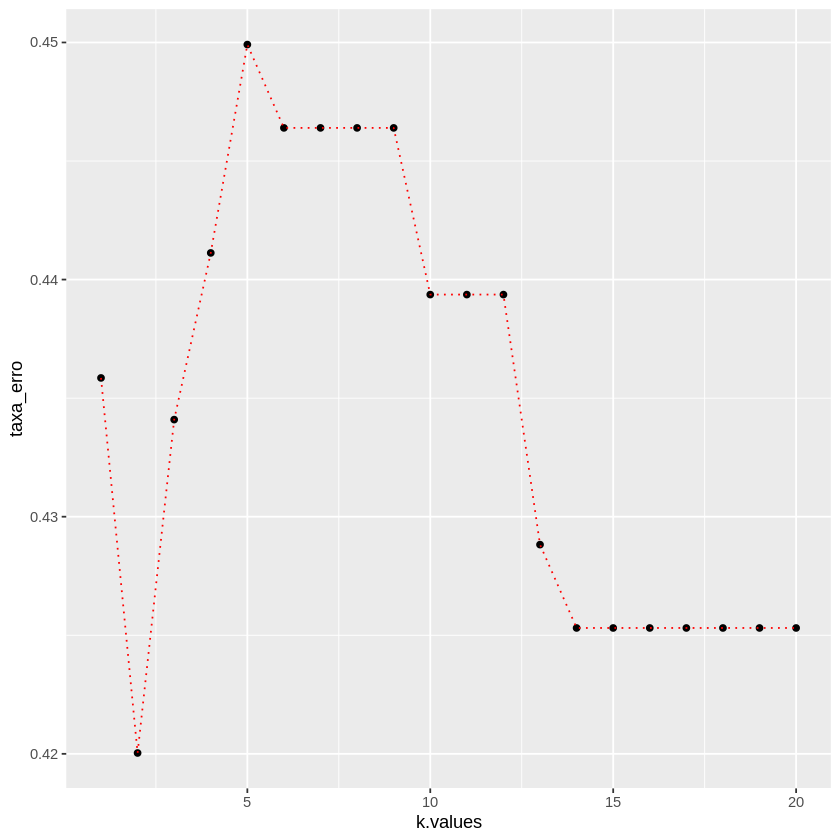

In [33]:
# Plotando os erros
ggplot(df_erro, 
       aes(x = k.values, y = taxa_erro)) +
  geom_point() + geom_line(lty = 'dotted', color = 'red')

O erro diminui a medida que o número de K aumenta!